# POLYNOMIAL REGRESSION

## 0. Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from sklearn import linear_model as lm
from sklearn import preprocessing as pp

## 1. Load Datasets

In [2]:
# Train Datasets
dataset_path = '../../datasets/regression/X_training.csv'
x_train = pd.read_csv(dataset_path)
dataset_path2 = '../../datasets/regression/y_training.csv'
y_train = pd.read_csv(dataset_path2)

# Test Datasets
dataset_path3 = '../../datasets/regression/X_test.csv'
x_test = pd.read_csv(dataset_path3)
dataset_path4 = '../../datasets/regression/y_test.csv'
y_test = pd.read_csv(dataset_path4)

# Validation Datasets
dataset_path5 = '../../datasets/regression/X_validation.csv'
x_val = pd.read_csv(dataset_path5)
dataset_path6 = '../../datasets/regression/y_val.csv'
y_val = pd.read_csv(dataset_path6)

In [3]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

## 2. Polynomial Regression

### 2.1 Model Definition and Training

In [4]:
poly = pp.PolynomialFeatures()
x_poly_train = poly.fit_transform(x_train)

model = lm.LinearRegression()
model.fit(x_poly_train, y_train)

LinearRegression()

### 2.2 Model Predict and Performance

In [5]:
# Predict Train
y_poly_train = model.predict(x_poly_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_poly_train)
mse_train = mt.mean_squared_error(y_train, y_poly_train)
rmse_train = np.sqrt(mse_train)
mae_train = mt.mean_absolute_error(y_train, y_poly_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_poly_train)

print(f"Train R2 Square: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}%")

Train R2 Square: 0.09419491057528107
Train MSE: 432.98620963865784
Train RMSE: 20.808320682809985
Train MAE: 16.458031755824436
Train MAPE: 8.350539820928136%


In [6]:
# Predict Validation
poly = pp.PolynomialFeatures()
x_poly_val = poly.fit_transform(x_val)
y_poly_val = model.predict(x_poly_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_poly_val)
mse_val = mt.mean_squared_error(y_val, y_poly_val)
rmse_val = np.sqrt(mse_val)
mae_val = mt.mean_absolute_error(y_val, y_poly_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_poly_val)

print(f"Validation R2 Square: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}%")

Validation R2 Square: 0.06647668389711636
Validation MSE: 445.7682234712755
Validation RMSE: 21.11322390046758
Validation MAE: 16.749939090484027
Validation MAPE: 8.5479310346054%


### 2.3 Fine Tunning

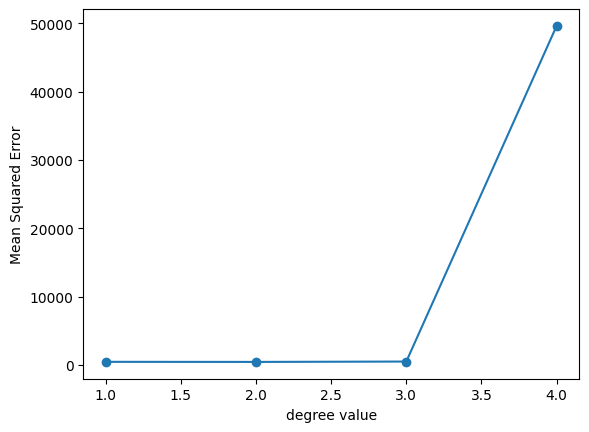

In [7]:
# Find Best degree Hyperparameter for Validation Data
d = np.arange(1, 5)
mse_list = []

for i in d:
    poly = pp.PolynomialFeatures(degree=i)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_val = poly.fit_transform(x_val)

    model = lm.LinearRegression()
    model.fit(x_poly_train, y_train)
    y_poly_val = model.predict(x_poly_val)

    mse = mt.mean_squared_error(y_val, y_poly_val)
    mse_list.append(mse)

plt.plot(d, mse_list, '-o')
plt.xlabel('degree value')
plt.ylabel('Mean Squared Error')
plt.show();

In [8]:
best_d = mse_list.index(min(mse_list))
d[best_d]

2

In [9]:
# Predict Validation with Best degree Value Found
poly = pp.PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_val = poly.fit_transform(x_val)

model = lm.LinearRegression()
model.fit(x_poly_train, y_train)
y_poly_val = model.predict(x_poly_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_poly_val)
mse_val = mt.mean_squared_error(y_val, y_poly_val)
rmse_val = np.sqrt(mse_val)
mae_val = mt.mean_absolute_error(y_val, y_poly_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_poly_val)

print(f"Validation R2 Square: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}%")

Validation R2 Square: 0.06647668389711636
Validation MSE: 445.7682234712755
Validation RMSE: 21.11322390046758
Validation MAE: 16.749939090484027
Validation MAPE: 8.5479310346054%


In [10]:
# Predict Test with Best degree Value Found
poly = pp.PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

model = lm.LinearRegression()
model.fit(x_poly_train, y_train)
y_poly_test = model.predict(x_poly_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_poly_test)
mse_test = mt.mean_squared_error(y_test, y_poly_test)
rmse_test = np.sqrt(mse_test)
mae_test = mt.mean_absolute_error(y_test, y_poly_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_poly_test)

print(f"Test R2 Square: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}%")

Test R2 Square: 0.09007934329900946
Test MSE: 443.04125572754435
Test RMSE: 21.048545216416844
Test MAE: 16.720535025987544
Test MAPE: 8.24246357705791%
